# qbraid.runtime.ionq

The [qBraid-SDK](https://github.com/qBraid/qBraid) is platform-agnostic quantum runtime framework. Distinguishing itself through a streamlined and highly-configurable approach to cross-platform integration, the qBraid-SDK does not assume a fixed target software framework. Instead, it allows providers to dynamically register any desired run input program type as the target, depending on their specific needs.

In [ ]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this
# cell, so you can comment it out if you need help debugging this step.

%pip install 'qbraid[ionq,visualization]'

In [ ]:
import os
from getpass import getpass
from qbraid.runtime import IonQProvider

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.

api_key = os.getenv("IONQ_API_KEY") or getpass("Enter your IonQ API key: ")

provider = IonQProvider(api_key=api_key)

In [3]:
# Now we set up our circuit. In this case, we're creating a circuit with two
# qubits, applying an H gate to qubit-0, a CXGate to both,.

program = """
OPENQASM 3;
include "stdgates.inc";
qubit[2] q;
h q[0];
cx q[0], q[1];
"""

In [4]:
# Before submitting the job, we can visualize the circuit using qasm3_drawer().
from qbraid.visualization import qasm3_drawer

qasm3_drawer(program)

     |---|
q0---| h |-----■---
     |---|     |
            |----|
q1----------| cx |-
            |----|


In [ ]:
device = provider.get_device("simulator")
job = device.run(program, name="qBraid example", shots=100)
results = job.result()

counts = results.data.get_counts()

print(counts)

{'00': 50, '11': 50}


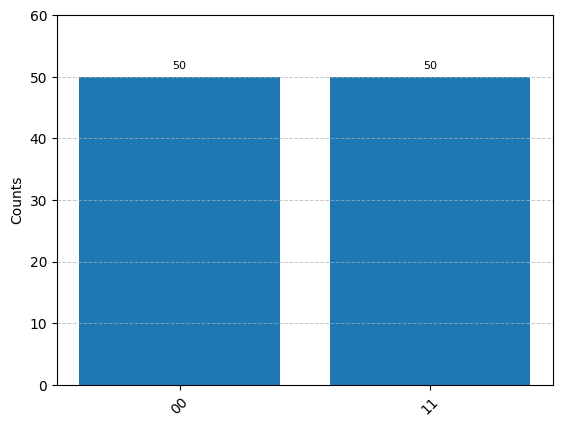

In [6]:
from qbraid.visualization import plot_histogram

plot_histogram(counts)